In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split
from sklearn import metrics
 

In [54]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [55]:
print(df_train.shape)
df_train.columns

(42000, 785)


Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [56]:
feature=[i for i in df_train.columns if i !="label"]

In [57]:
X_train,y_train=df_train[feature],df_train["label"]

In [58]:
X_train,y_train=np.array(X_train),np.array(y_train)
X_train.shape

(42000, 784)

In [59]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=1)
print(X_train.shape,X_val.shape)

(33600, 784) (8400, 784)


In [60]:
model=Sequential([
    Dense(units=25,activation="relu"),
    Dense(units=15,activation="relu"),
    Dense(units=10)
])

In [61]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])

In [62]:
model.fit(X_train_norm,y_train,epochs=100)

Epoch 1/100
1050/1050 [==============================] - 1s 757us/step - loss: 0.4617 - accuracy: 0.8653
Epoch 2/100
1050/1050 [==============================] - 1s 703us/step - loss: 0.2028 - accuracy: 0.9403
Epoch 3/100
1050/1050 [==============================] - 1s 701us/step - loss: 0.1560 - accuracy: 0.9545
Epoch 4/100
1050/1050 [==============================] - 1s 698us/step - loss: 0.1294 - accuracy: 0.9615
Epoch 5/100
1050/1050 [==============================] - 1s 705us/step - loss: 0.1118 - accuracy: 0.9644
Epoch 6/100
1050/1050 [==============================] - 1s 713us/step - loss: 0.0954 - accuracy: 0.9705
Epoch 7/100
1050/1050 [==============================] - 1s 745us/step - loss: 0.0870 - accuracy: 0.9725
Epoch 8/100
1050/1050 [==============================] - 1s 704us/step - loss: 0.0777 - accuracy: 0.9763
Epoch 9/100
1050/1050 [==============================] - 1s 701us/step - loss: 0.0697 - accuracy: 0.9783
Epoch 10/100
1050/1050 [==============================]

In [63]:
test_loss,test_accuracy=model.evaluate(X_val,y_val,verbose=2)

263/263 - 0s - loss: 268.3906 - accuracy: 0.7989 - 212ms/epoch - 807us/step


In [64]:
y_hat=model.predict(X_val)

263/263 [==============================] - 0s 589us/step


In [65]:
y_hat=tf.nn.softmax(y_hat).numpy()
y_hat.shape

(8400, 10)

In [66]:
yhat=[np.argmax(i) for i in y_hat]

In [67]:
confusion_matrix = metrics.confusion_matrix(y_val, yhat)

In [68]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

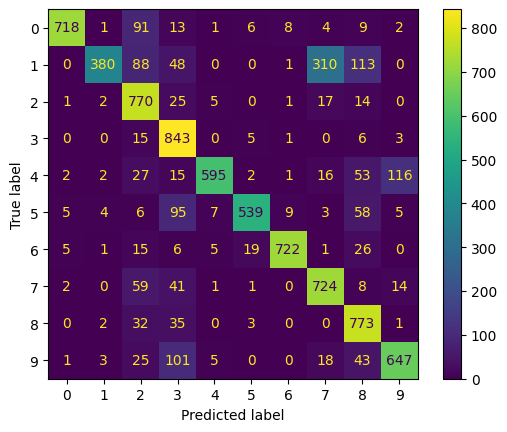

In [69]:
cm_display.plot()
plt.show()

